# **A/B Tests**

Imagine you are responsible for a service, say a website for pet adoption. You care about people booking a meeting to come visit and possibly adopt a stray. You have social-media outreach and key-word advertising to drive traffic, and you care specifically about the **conversion rate**: among the visitors who land on the home page, how many book a meeting.

To improve that conversion rate, you have an idea for an improvement: a cleaner page design or a more compelling call-to-action. You are not sure how effective it will be. The best way to do that is to **split** customers in two and show one half your existing set-up ('Control' or A) and the other half your modified, hopefully improved version ('Treatement', or B). If the improved version leads to a clearly better conversion, you probably want to adopt it.

It compares the two using a $t$-test to decide whether the observed difference is large enough to be meaningful, what we call **statistically significant**.

Spliting the traffic to an on-line service and comparing conversion rates with a $t$-test is a universally used approach to understand the impact of any change. In science, it’s known as a **random control trial** (RCT) but online services prefer to call it an **A/B-test**.


In A/B testing, two versions of the same marketing material are created: version A (the control group) and version B (the treatment group). The two versions are then randomly shown to different groups of users, and their responses are measured and compared.

In A/B testing, the treatment group is the group that receives the modified version of the marketing material being tested (version B), while the control group is the group that receives the original or existing version of the marketing material (version A).

The purpose of the control group is to establish a baseline or benchmark against which the performance of the treatment group can be measured. By measuring the performance of both groups, analysts can determine whether the changes made in the treatment group had a statistically significant impact on the measured response metrics.



## **T-Test**

A t-test is a statistical test used to determine if there is a significant difference between the response metrics of the treatment group and the control group. It helps in evaluating whether the observed difference in performance between the two groups is statistically significant or simply due to random chance.

There are two common types of t-tests used in A/B testing: the independent samples t-test and the paired samples t-test.

Independent samples t-test: This type of t-test is used when the treatment and control groups are independent of each other, meaning that each participant is assigned to either the treatment or control group, but not both. The independent samples t-test compares the means of the response metrics between the two groups. It assumes that the response metrics are normally distributed and have equal variances.

Paired samples t-test: This type of t-test is used when the treatment and control groups are dependent on each other. It is employed when each participant is exposed to both the treatment and control conditions, such as in a before-and-after scenario. The paired samples t-test compares the mean differences between the response metrics of the two conditions. It also assumes that the differences are normally distributed.

In both types of t-tests, the null hypothesis assumes that there is no significant difference between the response metrics of the treatment and control groups. The alternative hypothesis suggests that there is a significant difference. By calculating the t-statistic and comparing it to the critical value from the t-distribution, a p-value is obtained. If the p-value is below a predetermined significance level (typically 0.05), the null hypothesis is rejected, indicating a statistically significant difference between the groups.

T-tests provide a statistical framework to assess the significance of the observed differences in response metrics between the treatment and control groups, helping to determine the effectiveness of the changes made in the A/B test.

# 1. Import 
## Key libraries

In [24]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Event log data from a pickle file


In [25]:
events_df = pd.read_pickle('../data/events.pkl')

## Exploration

In [26]:
events_df.head()

,event_id,event_timestamp,event_type,page_url,page_url_path,referer_url,referer_url_scheme,referer_url_port,referer_medium,utm_medium,...,browser_user_agent,browser_language,os,os_name,os_timezone,device_type,device_is_mobile,user_custom_id,user_domain_id,variant
0,89b21c74-6b35-436e-8422-5c34e25a727d,2023-05-16 07:11:15.057247,pageview,http://www.dummywebsite.com/home,/home,www.facebook.com,http,80,internal,cpc,...,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4 like M...,quz_PE,Windows NT 5.2,Windows,Europe/Moscow,Computer,False,michaelhernandez@yahoo.com,65669b97-1065-43b5-9892-e477335175c6,Treatment
0,abb0d48b-34e9-45a8-a377-60c9e934390c,2023-05-16 07:11:44.649247,pageview,http://www.dummywebsite.com/home,/home,www.bing.com,http,80,search,cpc,...,Mozilla/5.0 (Windows 98; Win 9x 4.90) AppleWeb...,it_IT,Windows 98,Windows,Asia/Tokyo,Computer,False,rodriguezrobert@yahoo.com,ef2f545f-4650-42d4-9067-ccf1268218df,Control
1,d2863297-d71b-4197-95c5-16c9944e1797,2023-05-16 07:11:53.909247,pageview,http://www.dummywebsite.com/product_a,/product_a,www.bing.com,http,80,search,cpc,...,Mozilla/5.0 (Windows 98; Win 9x 4.90) AppleWeb...,it_IT,Windows 98,Windows,Asia/Tokyo,Computer,False,rodriguezrobert@yahoo.com,ef2f545f-4650-42d4-9067-ccf1268218df,Control
2,160f4a6b-f5c0-4f3c-a1d8-8b78a6eecbcf,2023-05-16 07:11:58.677247,pageview,http://www.dummywebsite.com/home,/home,www.bing.com,http,80,search,cpc,...,Mozilla/5.0 (Windows 98; Win 9x 4.90) AppleWeb...,it_IT,Windows 98,Windows,Asia/Tokyo,Computer,False,rodriguezrobert@yahoo.com,ef2f545f-4650-42d4-9067-ccf1268218df,Control
3,0eef7de6-970d-46c9-bc06-ac84e25c0090,2023-05-16 07:12:16.530247,pageview,http://www.dummywebsite.com/product_b,/product_b,www.bing.com,http,80,search,cpc,...,Mozilla/5.0 (Windows 98; Win 9x 4.90) AppleWeb...,it_IT,Windows 98,Windows,Asia/Tokyo,Computer,False,rodriguezrobert@yahoo.com,ef2f545f-4650-42d4-9067-ccf1268218df,Control


In [27]:
# change the datatype
events_df['event_timestamp'] =\
    events_df['event_timestamp'].astype('datetime64[ns]')

In [28]:
events_df['event_timestamp']

0     2023-05-16 07:11:15.057247
0     2023-05-16 07:11:44.649247
1     2023-05-16 07:11:53.909247
2     2023-05-16 07:11:58.677247
3     2023-05-16 07:12:16.530247
                 ...            
145   2023-05-16 09:38:04.012247
146   2023-05-16 09:38:42.377247
147   2023-05-16 09:39:01.383247
148   2023-05-16 09:39:28.315247
149   2023-05-16 09:40:29.229247
Name: event_timestamp, Length: 326, dtype: datetime64[ns]

In [30]:
daily_conversion = events_df\
    .groupby(['page_url_path', events_df.event_timestamp.dt.to_period('D')])\
    .agg({'user_domain_id': 'count'})\
    .unstack(level='page_url_path')
daily_conversion.head()

user_domain_id                                          \
page_url_path            /cart /confirmation /home /payment /product_a   
event_timestamp                                                          
2023-05-16                  30            13   144       17         75   

                            
page_url_path   /product_b  
event_timestamp             
2023-05-16              47

In [31]:
daily_conversion.columns = daily_conversion.columns.droplevel()

In [32]:
order=['/home','/product_a','/product_b','/cart','/payment','/confirmation']
daily_conversion = daily_conversion[order]

In [33]:
daily_conversion

page_url_path,/home,/product_a,/product_b,/cart,/payment,/confirmation
event_timestamp,,,,,,
2023-05-16,144,75,47,30,17,13


/Users/rajni.rughwani/Documents/Projects/Practiceprojects/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/rajni.rughwani/Documents/Projects/Practiceprojects/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/rajni.rughwani/Documents/Projects/Practiceprojects/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/rajni.rughwani/Documents/Projects/Practiceprojects/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identica

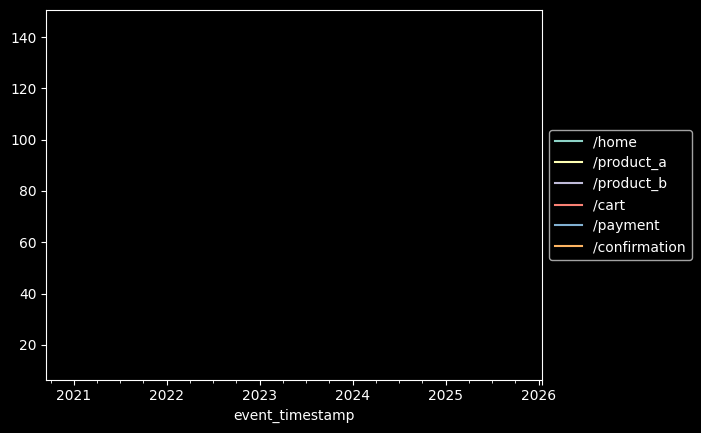

In [34]:
daily_conversion.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 2. Data processsing 
## Aggregate into conversion rates

In [12]:
total_users = events_df\
    .groupby(['variant'])\
    ['user_domain_id'].nunique()
conversion_count = events_df\
    .groupby(['variant', 'page_url_path'])\
    ['user_domain_id'].nunique()

In [13]:
conversion_count

variant    page_url_path
Control    /cart            16
           /confirmation     9
           /home            57
           /payment          9
           /product_a       31
           /product_b       21
Treatment  /cart             9
           /confirmation     4
           /home            53
           /payment          4
           /product_a       34
           /product_b       20
Name: user_domain_id, dtype: int64

In [14]:
total_users

variant
Control      65
Treatment    66
Name: user_domain_id, dtype: int64

In [18]:
conversion_rate = pd.DataFrame(conversion_count)\
    .join(total_users, on='variant', rsuffix='_total')

In [20]:
conversion_rate['conversion_rate'] =       \
    conversion_rate['user_domain_id'] /    \
    conversion_rate['user_domain_id_total']
conversion_rate

user_domain_id  user_domain_id_total  conversion_rate
variant   page_url_path                                                       
Control   /cart                      16                    65         0.246154
          /confirmation               9                    65         0.138462
          /home                      57                    65         0.876923
          /payment                    9                    65         0.138462
          /product_a                 31                    65         0.476923
          /product_b                 21                    65         0.323077
Treatment /cart                       9                    66         0.136364
          /confirmation               4                    66         0.060606
          /home                      53                    66         0.803030
          /payment                    4                    66         0.060606
          /product_a                 34                    66         0.515152
          /product_b                 20                    66         0.303030

In [21]:
conversion_rate.drop(
    columns=['user_domain_id'], inplace=True)
conversion_rate.columns = \
    ['visitors', 'conversion_rate']
conversion_rate

visitors  conversion_rate
variant   page_url_path                           
Control   /cart                65         0.246154
          /confirmation        65         0.138462
          /home                65         0.876923
          /payment             65         0.138462
          /product_a           65         0.476923
          /product_b           65         0.323077
Treatment /cart                66         0.136364
          /confirmation        66         0.060606
          /home                66         0.803030
          /payment             66         0.060606
          /product_a           66         0.515152
          /product_b           66         0.303030

## Pivot into parallel columns

In [22]:
conversion_rate = conversion_rate\
    .pivot_table(
        index='page_url_path',
        columns='variant',
        values=['visitors', 'conversion_rate']) \
    .sort_values(
        ('conversion_rate', 'Treatment'),
        ascending=False
    )
conversion_rate

conversion_rate           visitors          
variant               Control Treatment  Control Treatment
page_url_path                                             
/home                0.876923  0.803030     65.0      66.0
/product_a           0.476923  0.515152     65.0      66.0
/product_b           0.323077  0.303030     65.0      66.0
/cart                0.246154  0.136364     65.0      66.0
/confirmation        0.138462  0.060606     65.0      66.0
/payment             0.138462  0.060606     65.0      66.0

# 3. Compute statistical tests

## $t$-test

The most commonly used statistical test is the $t$-test.

$t$ is the **normalised** difference between two measures using the expected standard deviation:

$$t = \frac{\Delta\overline{X}}{s_{\Delta\bar{X}}}$$

where 
* $X$ is our objective (conversion),
*  $\overline{X}$ the average over a sample (conversion rate)
*  $\Delta\overline{X}$ the difference, and 
*  $s_{\Delta\overline{X}}$ is the **standard deviation** of that difference, i.e. the commonly observed difference between two indepedent measurements from the same origin.

This score can be compared to a normalised $t$-distribution:

![t-distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Student_T-Distribution_Table_Diagram.svg/2560px-Student_T-Distribution_Table_Diagram.svg.png)

If we assumed there were no difference, when $t$ is very large (typically around 2), that observersation is an outlier. Therefore, we would have to reject that assumption. We consider that difference significant.

## Welch’s $t$-test

Welch suggested a version when both Control and Treatment offer an estimate the standard deviation: 
$$ t = \frac{\overline{X}_T - \overline{X}_C}
            {\sqrt{
               {s_{\overline{X}_T}^2} +
               {s_{\overline{X}_C}^2}
            }} $$

With conversion rate, the variance of one observation can be estimated as:

$$ s_{X_Ti}^2 = \overline{X}_T (1-\overline{X}_T) \qquad
   s_{X_Ci}^2 = \overline{X}_C (1-\overline{X}_C)$$

The variance of the sum of $n$ independent observations of variance $s^2$ is $n$ times larger. The variance of an average, $n^2$ smaller:
$$ s_{\overline{X}_T}^2 = \frac{n.s^2}{n^2} = \frac{s_{X_Ti}^2}{n} \qquad
   s_{\overline{X}_C}^2 = \frac{s_{X_Ci}^2}{n}
$$

Therefore, 
$$ t = \frac{\overline{X}_T - \overline{X}_C}
            {s_{\Delta\overline{X}}} $$
where 
$$ s_{\Delta\overline{X}} = \sqrt{
   \frac{\overline{X}_T(1-\overline{X}_T)}{n_T} +
   \frac{\overline{X}_C(1-\overline{X}_C)}{n_C}
} $$


In [ ]:
from scipy.stats import t
alpha = 0.05

def compute_t_test(c):    
    c['difference'] =                               \
        c['conversion_rate']['Treatment'] -         \
        c['conversion_rate']['Control']
    c['stdev'] = (
            c['conversion_rate']['Treatment'] *     \
            (1 - c['conversion_rate']['Treatment'])/
                c['visitors']['Treatment'] +  
            c['conversion_rate']['Control'] *       \
            (1 - c['conversion_rate']['Control'])/
                c['visitors']['Control']
        ) ** 0.5
    c['t-score'] = c['difference'] / c['stdev']
    c['degrees_freedom'] =                          \
        c['visitors']['Control'] +                  \
        c['visitors']['Treatment'] - 1
    c['p-value'] = t.sf(
        np.abs(c['t-score']),
        c['degrees_freedom']
    ) * 2
    c['minimum_detectable_effect'] =                \
        t.ppf(1 - alpha/2, c['degrees_freedom']) *  \
        c['stdev']
    c['significant'] = c['p-value'] < alpha
 
    return c

In [ ]:
for d in [alpha/2, 1 - alpha/2]:
    print(f'{d=}: t={t.ppf(d, 1000)}')

# Results of the t-test

In [ ]:
compute_t_test(conversion_rate)

## Interview Questions

* What is A/B testing, and why is it commonly used in data-driven decision-making?

* What is the difference between the treatment group and the control group in an A/B test?

* How do you determine the sample size for an A/B test? What factors influence this decision?


* What is hypothesis testing, and how does it apply to A/B testing?

* What is the p-value in A/B testing, and how do you interpret its significance?

* What are Type I and Type II errors in A/B testing, and how do they relate to statistical significance and statistical power?

